
#### Objective
To gain understanding of single linear regression through implementing the model from scratch

#### Tasks
1. Download the Students performance dataset available on 
UCI repository (https://archive.ics.uci.edu/ml/datasets/student+performance ) which consists of a total of 32 attributes. 
2. Read  the dataset (use read_csv() from pandas ) into some variable. Take the last two columns (G2 and G3) into XY.
3. Print the different statistical values of data contained in XY using describe() function from pandas.
4. Divide XY into X consisting of G2 and Y consisting of G3. Print the shape of both.
5. Add a column at position 0 with all values=1.
6. Print some of the rows from XY.
7. Complete the following functions given in the provided Ipython Notebook to implement a Linear Regression model between X and Y (Y = mX + C).
•	Write code to predict G3 for a given set of weights and input G2.
•	Write a function to calculate the loss (mean squared error) for given set of weights, input G2 and actual output G3
•	Write a function to calculate the gradient for given set of weights, input G2 and actual output G3
•	Write a function to perform gradient decent for given set of input G2 and actual output G3
8. Play with different values of max_iterations and the learning rate.

Additional fun (will not be evaluated)
9. Split the data in X_train, X_test, Y_train, Y_test (sklearn.model_selection.train_test_split function)
10. Calculate mean squared error on both X_train and X_test.
11. Generalize the code for multivariate(multiple) linear regression.

#### Resources
- Linear regression maths: https://www.youtube.com/watch?v=ZkjP5RJLQF4
- Simple linear regression: https://www.youtube.com/watch?v=iAgYLRy7e20
- Tutorial: https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In C:\Users\Akshat\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Akshat\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Akshat\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Akshat\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Akshat\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [2]:
# Read the data from provided dir
data = pd.read_csv("student/student-mat.csv", delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
# Add column which has all 1s
# The idea is that weight corresponding to this column is equal to intercept
# This way it is efficient and easier to handle the bias/intercept term
data["halua"] = 1
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,halua
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,1


In [4]:
# Print the dataframe rows
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,halua
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,1
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,1
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,1


In [5]:
# Define X (input features) and y (output feature) 
X = data["G2"]
y = data["G3"]
series = pd.Series([1 for x in range(len(data.index))]).to_frame()
X = pd.concat([series,X],axis =1)

In [6]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)

print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'pandas.core.frame.DataFrame'>, Shape-(395, 2)
y: Type-<class 'pandas.core.series.Series'>, Shape-(395,)


__Expected output__:<br><br>
X: Type-<class 'numpy.ndarray'>, Shape-(395,2)<br>
y: Type-<class 'numpy.ndarray'>, Shape-(395,)

Let us visualize the relationship between X and y

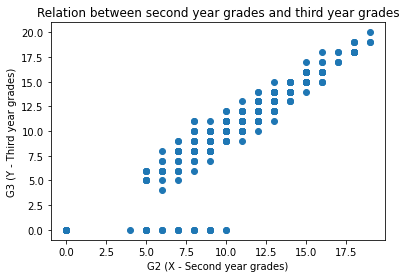

In [7]:
# DO NOT EDIT THIS CODE CELL
plt.scatter(X.iloc[:,1],y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

##### Let us start implementing linear regression from scratch. Just follow code cells, see hints if required.

In [8]:
def predict(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###
    y_pred = np.dot(X,weights)
    ### END CODE HERE ###
    
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [9]:
def mean_squared_error(y_true, y_pred) : 
    '''
    y_true : (m,1)
    y_pred : (m,1)
    
    Return the mean squared error
    '''
    ### START CODE HERE ###
    loss = np.mean((y_true-y_pred)**2)/2
    ### END CODE HERE ###
    
    return loss

In [10]:
def gradient(X, y_true, y_pred, weights):
    '''
    X      : array (m,2)
    y_true : array (m,1)
    y_pred : array (m,1)
    
    Returns a numpy array with gradients. Shape (2,1)
    '''
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    grad = np.zeros(2,)
    
    
    ### START CODE HERE ###
    
    grad[0] = np.mean((y_pred - y_true))
    grad[1] = np.mean((y_pred - y_true)*X[:,1])
    
    ### END CODE HERE ###
    
    return grad

In [15]:
def gradient_descent(X, y, learning_rate=0.01, max_iterations=100):
    '''
    X              : Array (m,2)
    y              : Array (m,1)
    learning_rate  : Learning rate
    max_iterations : Maximum iteratons
    
    Returns : weights vector (2,1)
            : losses (List)
    '''
    # Initialise weights vector of random values of size (2,1)
    weights = np.random.rand(2)
    # Initialize a list to record all the losses
    losses  = []
    
    ### START CODE HERE ###
        
    for iter in range(max_iterations):
       y_pred = predict(X,weights)
       loss = mean_squared_error(y,y_pred)
       losses.append(loss)
       grads = gradient(X, y , y_pred, weights)
       weights[0] = weights[0] - learning_rate*grads[0]
       weights[1] = weights[1] - learning_rate*grads[1]
    ### END CODE HERE ###
    
    return weights, losses

##### Congratulations! You have implemented linear regression from scratch. Let's see this in action.

In [16]:
# Perform gradient descent
optimal_weights, losses = gradient_descent(X.values, y.values, 0.001, 100)

In [17]:
# DO NOT CHANGE THE FOLLOWING CODE CELLS
# Print final loss
print("Mean squared error:", losses[-1])

Mean squared error: 2.190754698783028


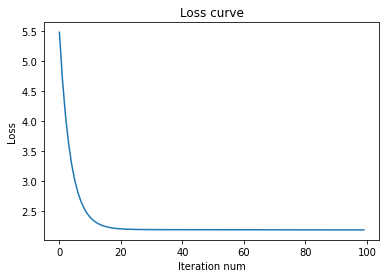

In [18]:
# Plot the loss curve
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [19]:
# Make predictions using trained weights
y_pred = hypothesis(X, optimal_weights)

NameError: name 'hypothesis' is not defined

In [20]:
# Visualize the results by plotting it
plt.scatter(X[:,1], y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()

TypeError: '(slice(None, None, None), 1)' is an invalid key